In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point
df = gpd.read_file('/data/acker/ALA/paper2/washu_2021-2023_merged.shp')
df

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Val,geometry
0,0,02090,14.333333,02,090,1,02_090,12.1,"POLYGON ((-148.66326 64.59079, -148.64821 64.5..."
1,1,06063,14.200000,06,063,2,06_063,14.0,"POLYGON ((-121.49703 40.43702, -121.49487 40.4..."
2,2,06107,12.933334,06,107,4,06_107,15.7,"POLYGON ((-119.56647 36.49434, -119.56366 36.4..."
3,3,06023,12.633334,06,023,5,06_023,6.9,"POLYGON ((-124.4086 40.4432, -124.39664 40.462..."
4,4,06029,12.599999,06,029,6,06_029,16.2,"POLYGON ((-120.19437 35.78936, -120.00308 35.7..."
...,...,...,...,...,...,...,...,...,...
531,531,02020,4.133333,02,020,3118,02_020,5.1,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691..."
532,532,02110,3.900000,02,110,3128,02_110,4.6,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675..."
533,533,15001,3.633333,15,001,3133,15_001,4.4,"POLYGON ((-156.06147 19.72813, -156.06076 19.7..."
534,534,15009,3.556667,15,009,3136,15_009,4.0,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957..."


In [2]:
df = df.rename(columns={'Design Val':'Design Value'})

In [3]:
#upload shapefile of U.S. counties
counties = gpd.read_file('/data/acker/shapefiles/cb_2020_us_county_500k.shp')

In [4]:
# List of state abbreviations for CONUS, Alaska (AK), and Hawaii (HI)
states_to_include = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'DC',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
]

# Filter counties to only include rows where STUSPS is in the specified list
counties_conus = counties[counties['STUSPS'].isin(states_to_include)]

# Display the filtered counties
counties_conus

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,13,031,00350302,0500000US13031,13031,Bulloch,Bulloch County,GA,Georgia,06,1750735216,32827779,"POLYGON ((-82.02684 32.55516, -82.02527 32.558..."
1,13,121,01694833,0500000US13121,13121,Fulton,Fulton County,GA,Georgia,06,1364133162,19666288,"POLYGON ((-84.84931 33.51318, -84.84429 33.514..."
2,13,179,00357095,0500000US13179,13179,Liberty,Liberty County,GA,Georgia,06,1337654102,222884791,"POLYGON ((-81.8244 32.01488, -81.81338 32.0162..."
3,13,189,00348794,0500000US13189,13189,McDuffie,McDuffie County,GA,Georgia,06,666590014,23114032,"POLYGON ((-82.64852 33.60838, -82.64409 33.606..."
4,13,213,01688005,0500000US13213,13213,Murray,Murray County,GA,Georgia,06,892235145,5719644,"POLYGON ((-84.94434 34.68004, -84.9431 34.6804..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,41,049,01135860,0500000US41049,41049,Morrow,Morrow County,OR,Oregon,06,5259046087,44372730,"POLYGON ((-120.00631 45.27648, -120.00556 45.3..."
3229,21,073,00516883,0500000US21073,21073,Franklin,Franklin County,KY,Kentucky,06,538312209,10786432,"POLYGON ((-85.02426 38.13059, -85.02299 38.131..."
3230,17,201,01785216,0500000US17201,17201,Winnebago,Winnebago County,IL,Illinois,06,1328792556,15873993,"POLYGON ((-89.40142 42.50043, -89.37175 42.500..."
3231,17,123,00424260,0500000US17123,17123,Marshall,Marshall County,IL,Illinois,06,1001843226,30364348,"POLYGON ((-89.63869 40.98691, -89.63868 40.988..."


In [5]:
counties_conus = counties_conus.drop(["COUNTYNS", 'NAMELSAD', 'LSAD', 'ALAND', 'AWATER', 'AFFGEOID'], axis=1)

In [6]:
counties_conus = counties_conus.to_crs(df.crs)

In [7]:
merged_df = df

In [8]:
merged_df['diff'] =  merged_df['PM25_90th'] - merged_df['Design Value']
merged_df['diff'].describe()

count    536.000000
mean       0.064832
std        1.227862
min       -5.333334
25%       -0.533333
50%        0.133334
75%        0.775000
max        5.733334
Name: diff, dtype: float64

In [9]:
merged_df['diff'] =  abs(merged_df['PM25_90th'] - merged_df['Design Value'])
merged_df['diff'].describe()

count    536.000000
mean       0.898078
std        0.838930
min        0.000000
25%        0.300000
50%        0.633334
75%        1.266666
max        5.733334
Name: diff, dtype: float64

In [10]:
# Define threshold
threshold = 9.0

# Function to classify each row
def classify(row):
    cdv = row['Design Value']
    cdve = row['PM25_90th']
    if cdv > threshold and cdve > threshold:
        return 'AP'
    elif cdv > threshold and cdve <= threshold:
        return 'NN'
    elif cdv <= threshold and cdve > threshold:
        return 'NP'
    else:
        return 'AN'

# Apply the classification
merged_df['classification'] = merged_df.apply(classify, axis=1)

# Print counts
print(merged_df['classification'].value_counts())

# Optional: filter into separate DataFrames
AP = merged_df[merged_df['classification'] == 'AP']
NP = merged_df[merged_df['classification'] == 'NP']
NN = merged_df[merged_df['classification'] == 'NN']
AN = merged_df[merged_df['classification'] == 'AN']


classification
AN    376
AP     63
NN     52
NP     45
Name: count, dtype: int64


In [11]:
# Define threshold and margin
threshold = 9.0
margin = 0.5  # Adjust to 1.0 for a ±1.0 µg/m³ range

# Calculate the absolute difference between CDVE and the threshold
merged_df['cdve_diff'] = abs(merged_df['PM25_90th'] - threshold)

# Identify near-miss counties
merged_df['near_miss1'] = merged_df['cdve_diff'] <= margin

# Optional: Count the number of near-miss counties
num_near_miss = merged_df['near_miss1'].sum()
print(f"Number of near-miss counties (±{margin} µg/m³): {num_near_miss}")


Number of near-miss counties (±0.5 µg/m³): 137


In [12]:
# Define threshold and margin
threshold = 9.0
margin = 0.5  # Adjust to 1.0 for a ±1.0 µg/m³ range

# Calculate the absolute difference between CDVE and the threshold
merged_df['cdv_diff'] = abs(merged_df['Design Value'] - threshold)

# Identify near-miss counties
merged_df['near_miss2'] = merged_df['cdv_diff'] <= margin

# Optional: Count the number of near-miss counties
num_near_miss = merged_df['near_miss2'].sum()
print(f"Number of near-miss counties (±{margin} µg/m³): {num_near_miss}")


Number of near-miss counties (±0.5 µg/m³): 113


In [13]:
merged_df['near_miss1']

0      False
1      False
2      False
3      False
4      False
       ...  
531    False
532    False
533    False
534    False
535    False
Name: near_miss1, Length: 536, dtype: bool

In [14]:
both = merged_df[(merged_df['near_miss1'] == True) & (merged_df['near_miss2'] == True)]
both['diff'].describe()

count    6.100000e+01
mean     2.956285e-01
std      2.417700e-01
min      5.722046e-07
25%      1.333334e-01
50%      2.333334e-01
75%      4.333330e-01
max      9.333334e-01
Name: diff, dtype: float64

In [15]:
# Group by classification and get mean, min, and max for CDVE and CDV
merged_df.groupby('classification')[['PM25_90th', 'Design Value']].agg(['mean', 'min', 'max'])



PM25_90th                      Design Value           
                     mean       min        max         mean  min   max
classification                                                        
AN               7.467598  3.100000   9.000000     7.223138  2.7   9.0
AP              10.281958  9.033334  14.333333    10.761905  9.1  16.2
NN               8.180128  5.100000   9.000000     9.863462  9.1  13.1
NP               9.560074  9.033334  12.633334     8.213333  6.5   9.0

In [16]:
# Extract the North Slope row from `counties_conus`
north_slope = counties_conus[counties_conus['GEOID'] == '02185'].copy()

# Set the `PM25_90th` column to None (or NaN) so it appears gray on the plot
north_slope['PM25_90th'] = None


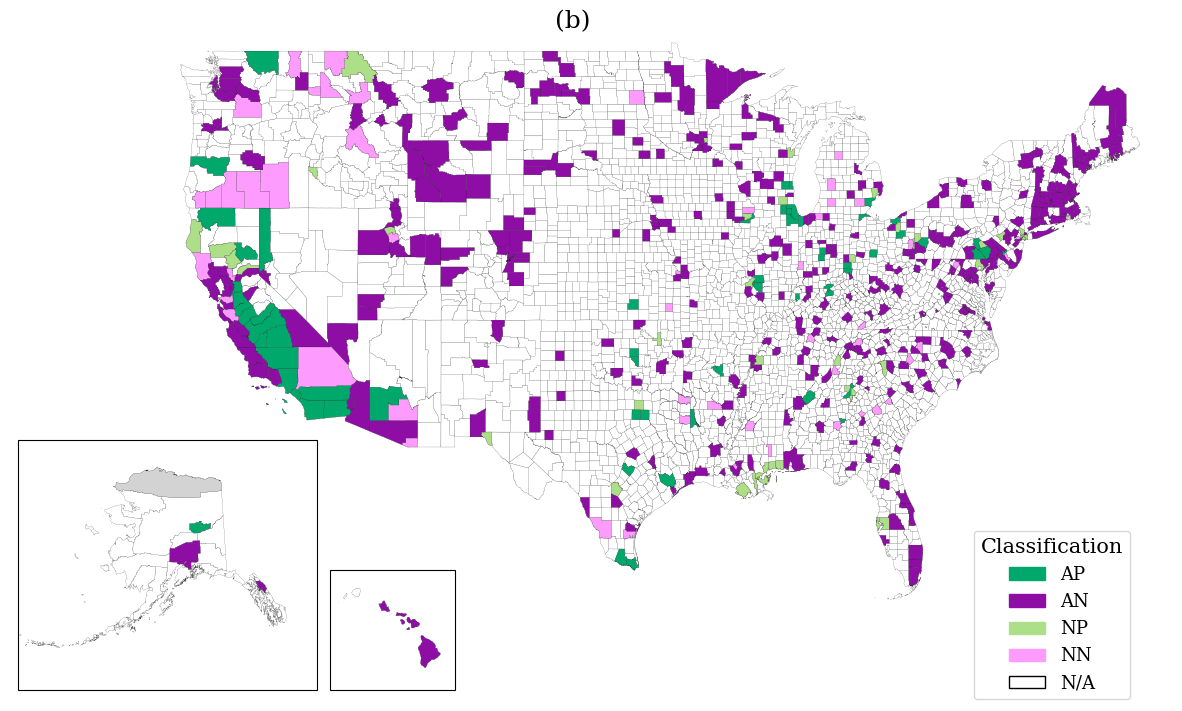

In [17]:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import geopandas as gpd

gdf_epa = merged_df.to_crs("EPSG:4326")

# Define the data column and the range colors
data_column = 'classification'
range_colors = {
    'AP': "#00A86B",
    'AN': "#8E0EA5",
    'NP': "#ACDF87",
    'NN': "#fe9bfe"
}

# Assign colors manually
def assign_color(value):
    if value == 'AP':
        return '#00A86B'
    elif value == 'AN':
        return '#8E0EA5'
    elif value == 'NP':
        return '#ACDF87'
    else:  # NN
        return '#fe9bfe'

# Create a new column for colors
gdf_epa['color'] = gdf_epa[data_column].apply(assign_color)


# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds
ax_conus.set_frame_on(False)
# Alaska inset with rotation and correct projection
# Alaska inset with a rotated projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.17, 0.22, 0.25], projection=alaska_projection)

ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Plot Alaska counties
'''alaska_counties.plot(
    color=gdf_epa['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)'''


# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.17, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

counties_conus.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_conus
)
counties_conus.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
counties_conus.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Plot the data for each map, including the color for missing data
gdf_epa.plot(
    color=gdf_epa['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)
gdf_epa.plot(
    color=gdf_epa['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
gdf_epa.plot(
    color=gdf_epa['color'], linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Add a custom legend
# Reverse the legend patches so the highest value is at the top
#legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(["N/A"]+labels)]
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
plt.rcParams["font.family"] = "serif"

# Add a custom legend
labels = ["AP", "AN", "NP", "NN"]
# Reverse the legend patches so the highest value is at the top
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in labels]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")


# Combine all legend patches
legend_patches.append(na_patch)

plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(6.5, 1.4),  # Adjusted to place it in the lower right corner
    title="Classification",
    fontsize=13,
    title_fontsize=15
)

# Add a title to the plot
fig.suptitle('(b)', fontsize=18, y=0.85)
#plt.savefig('epa_dv.jpg', dpi=1000)
plt.show()


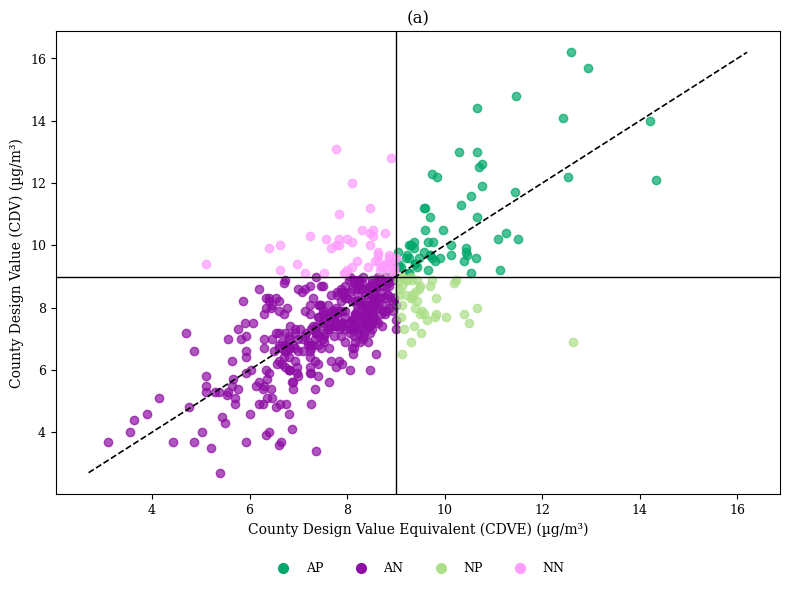

In [20]:
import matplotlib.pyplot as plt

# Assuming 'classification' column already exists in merged_df
x = merged_df['PM25_90th']  # CDVE (prediction)
y = merged_df['Design Value']  # CDV (truth)

plt.figure(figsize=(8, 6))

# Optional: color by classification
colors = {
    'AP': "#00A86B",
    'AN': "#8E0EA5",
    'NP': "#ACDF87",
    'NN': "#fe9bfe"
}

# Scatter points by classification
for label, group in merged_df.groupby('classification'):
    plt.scatter(
        group['PM25_90th'],
        group['Design Value'],
        alpha=0.7,
        edgecolors=None,
        label=label,
        color=colors.get(label, 'gray')
    )

# 1:1 line (perfect agreement)
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    color='black',
    linestyle='--',
    linewidth=1.2
)


# Add threshold lines at 9.0 µg/m³
plt.axhline(9.0, color='black', linestyle='-', linewidth=1)
plt.axvline(9.0, color='black', linestyle='-', linewidth=1)

# Format
plt.rcParams["font.family"] = "serif"
plt.xlabel('County Design Value Equivalent (CDVE) (µg/m³)', fontsize=10)
plt.ylabel('County Design Value (CDV) (µg/m³)', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title('(a)', fontsize=12)
plt.grid(False)
import matplotlib.lines as mlines

# Manually create legend handles in desired order
legend_order = ['AP', 'AN', 'NP', 'NN']
legend_handles = [
    mlines.Line2D([], [], color=colors[label], marker='o', linestyle='None',
                  markersize=7, markeredgecolor=None, label=label)
    for label in legend_order
]
plt.legend(
    handles=legend_handles,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.2),
    ncol=4,
    frameon=False,
    fontsize=9
)

plt.tight_layout()
plt.savefig("fig1a.png", dpi=1000)
plt.show()
